In [2]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import norm
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]


# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 1.2
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# out_dir='plots'
# if not os.path.isdir(out_dir):
#     os.makedirs(out_dir)
# save = True

In [3]:
ls -l ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs5_BatchSize1024_from25_ntrain5296128_nval596992_run0/

total 114956
-rw-r----- 1 bbbam bbbam 23541481 Oct 24 01:08 epoch26_val_pseudoscalar_mae1.8051_inference_data.pkl
-rw-r----- 1 bbbam bbbam 23541493 Oct 24 01:08 epoch27_val_pseudoscalar_mae1.7999_inference_data.pkl
-rw-r----- 1 bbbam bbbam 23541918 Oct 24 01:08 epoch28_val_pseudoscalar_mae1.7977_inference_data.pkl
-rw-r----- 1 bbbam bbbam 23538427 Oct 24 01:08 epoch29_val_pseudoscalar_mae1.7987_inference_data.pkl
-rw-r----- 1 bbbam bbbam 23543161 Oct 24 01:08 epoch30_val_pseudoscalar_mae1.8015_inference_data.pkl


# -------------m1To17p2_5channel_v2_[8,16,32,64]------------

In [4]:
local='/global/homes/b/bbbam/mass_reg_with_neg_mass/13_channels_massregressor_ResNet_3/INFERENCE_DATA/'
rhFileList = '%s/*.pkl'%(local)
paths = np.sort(glob.glob(rhFileList))
assert len(paths) > 0
print(f"{len(paths)} files found")

8 files found


In [5]:
epoch=2

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  /global/homes/b/bbbam/mass_reg_with_neg_mass/13_channels_massregressor_ResNet_3/INFERENCE_DATA/epoch2__mae2.0771_inference_data.pkl


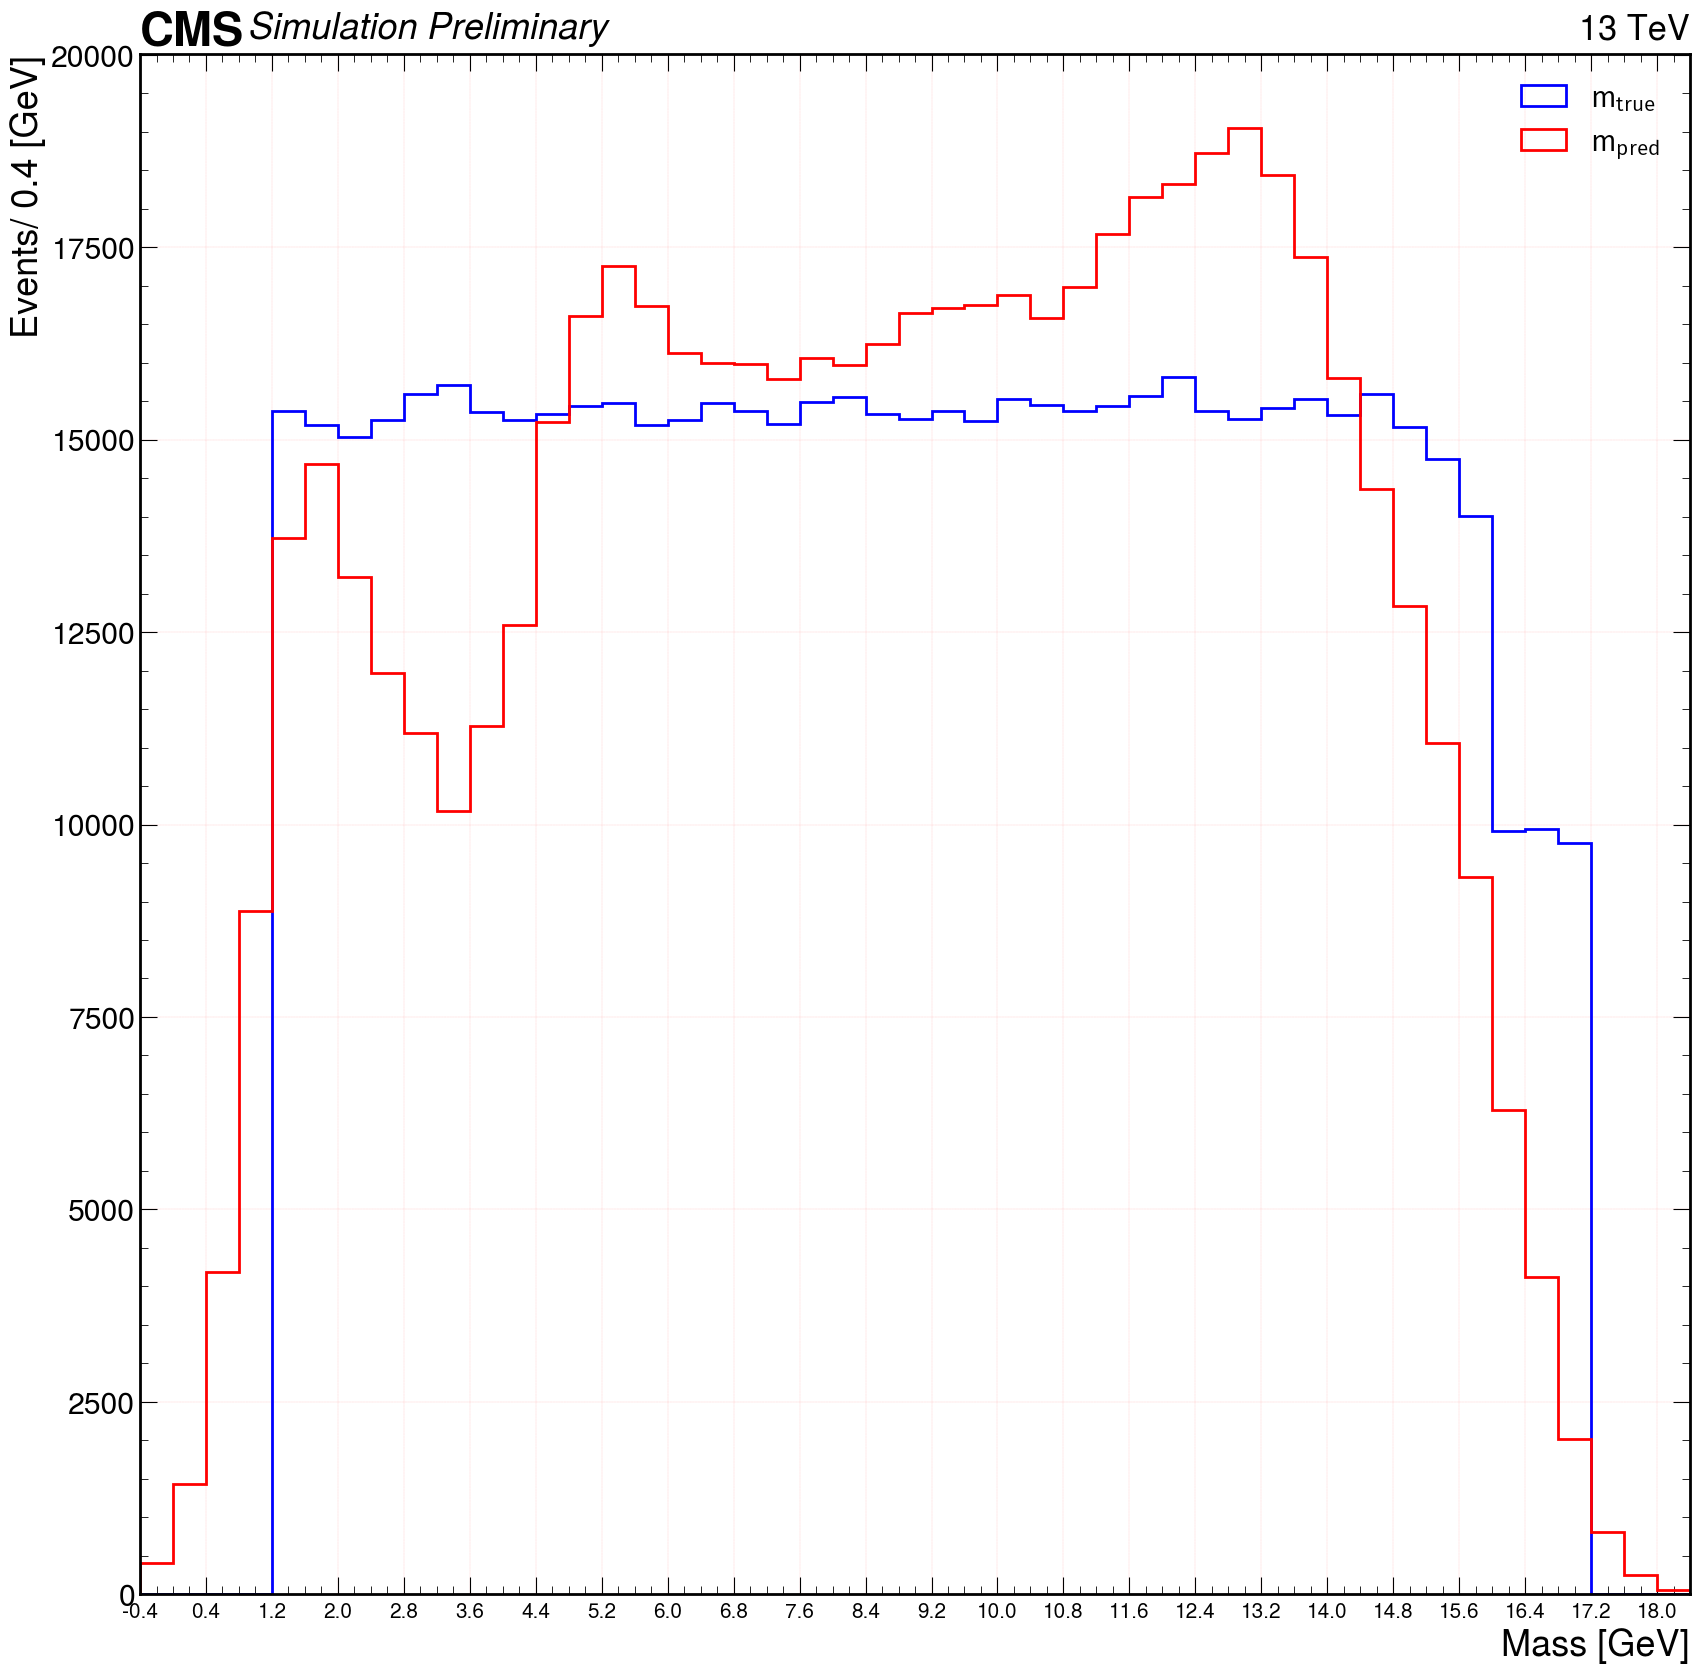

In [6]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 17.2
bin_size =0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# # Truncated version
# fig, ax = plt.subplots(figsize=(20,20))
# plt.hist(m_true_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
# plt.hist(m_pred_, range=(m0_min-bin_size,m0_max+bin_size), bins=len(np.arange(m0_min-0.4,m0_max+0.4,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
# plt.xlim(m0_min-bin_size,m0_max+bin_size)
# plt.xticks(np.arange(m0_min,m0_max+bin_size,bin_size),size=15)
# plt.grid(color='r', linestyle='--', linewidth=.1)
# plt.xlabel('Mass [GeV]')
# plt.ylabel('Events/ 0.4 [GeV]' )
# # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses', size=25)
# plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# # plt.savefig('%s/%d_mtru_mpred_hist_truncate.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
# plt.show()

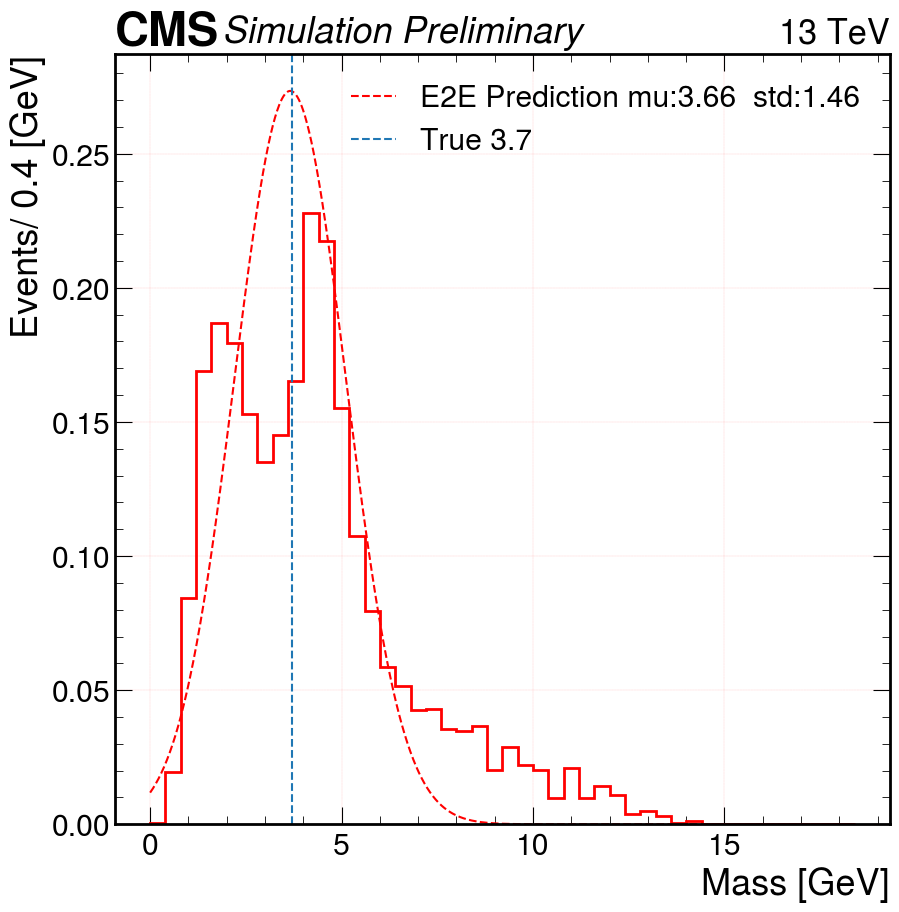

In [6]:

m_pred = []
m_pred1=[]
low_mass = 3.6
high_mass = 3.8
mass = (high_mass + low_mass)/2
for i in range(len(m_true_)):
    if m_true_[i] >high_mass or m_true_[i] < low_mass:continue
    m_pred1.append(m_pred_[i])
    if m_pred_[i] >7 or m_pred_[i] <1.2 : continue
    m_pred.append(m_pred_[i])

mu, std = norm.fit(m_pred)
x = np.linspace(0,m0_max+1.2, num=1000)
y = norm.pdf(x, mu, std)
    
fig, ax = plt.subplots()
plt.hist(np.array(m_pred1).flatten(),density=True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='r', linewidth=2)
plt.plot(x, y,linestyle='--', color='red',label=f'E2E Prediction mu:{np.round(mu,2)}  std:{np.round(std,2)}')
plt.axvline(x= mass,linestyle='--',label=f'True {mass}')
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


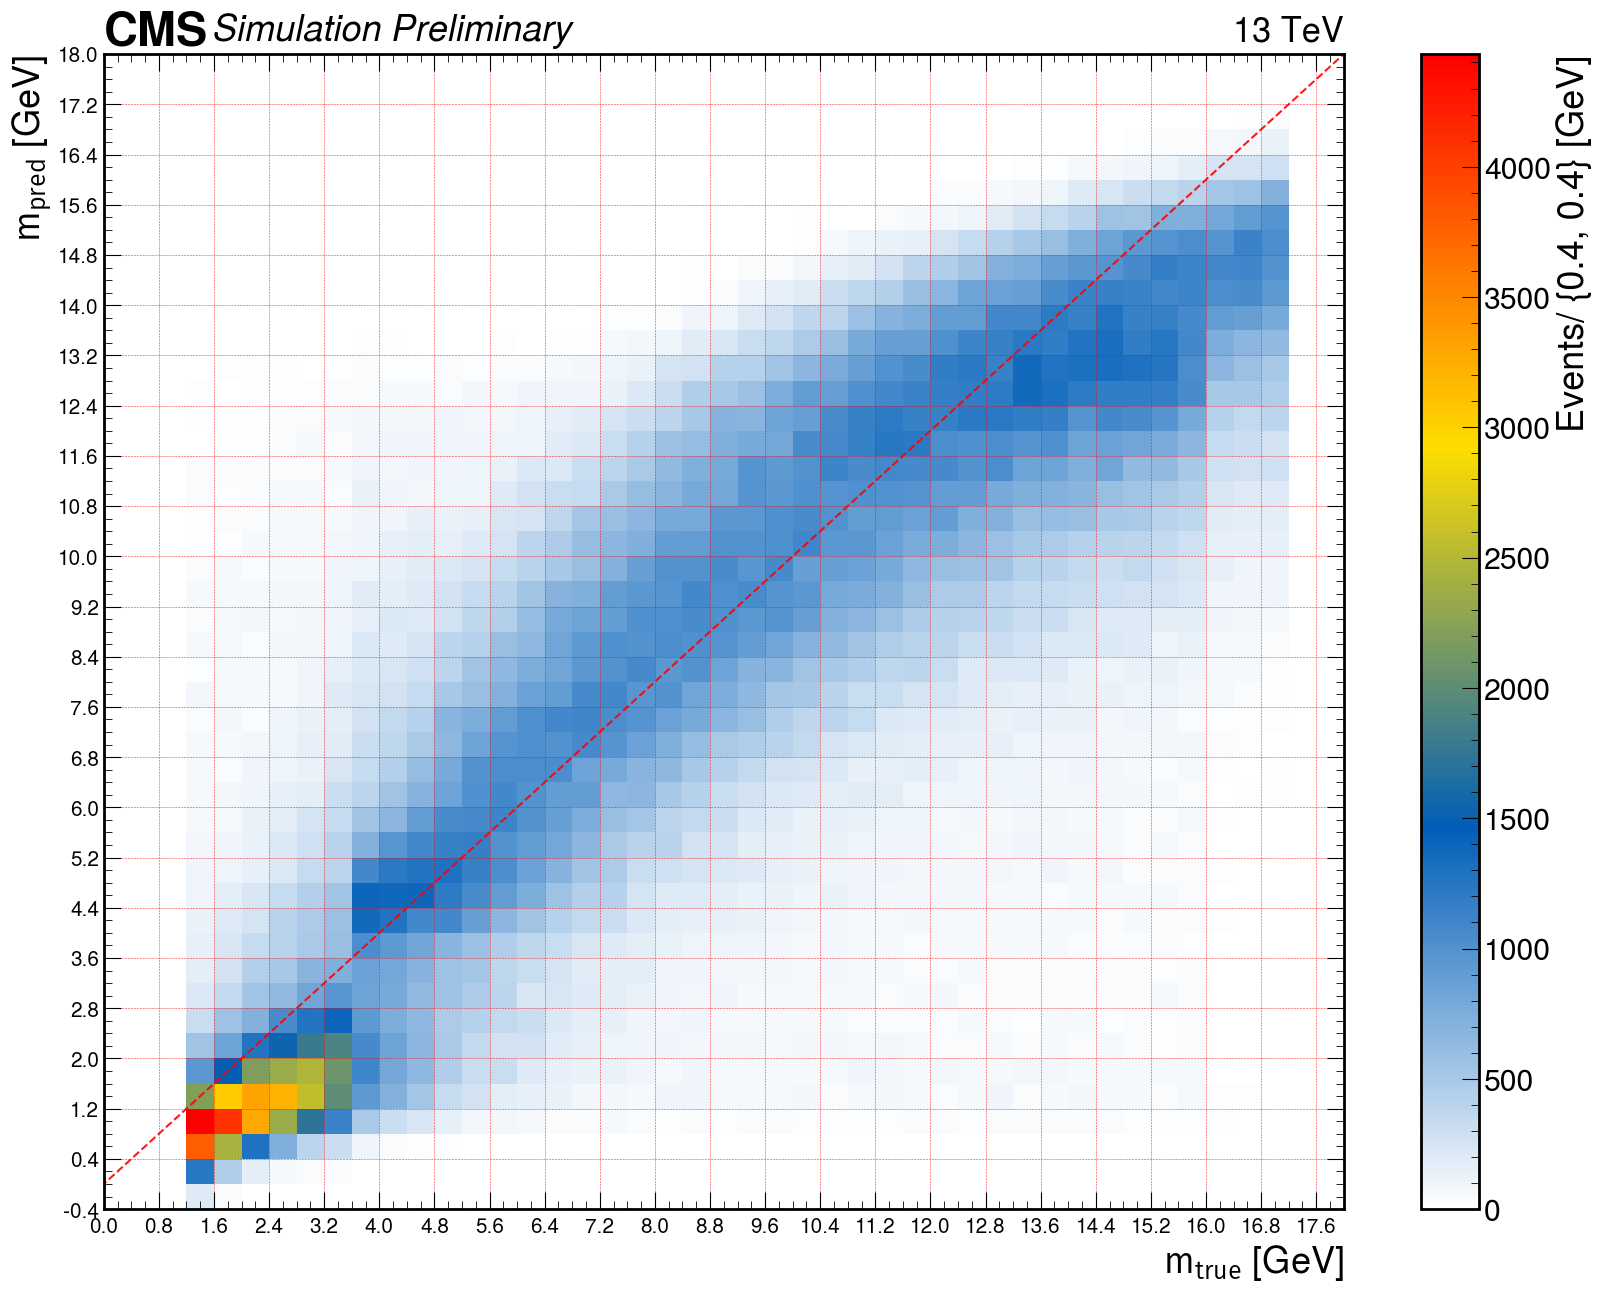

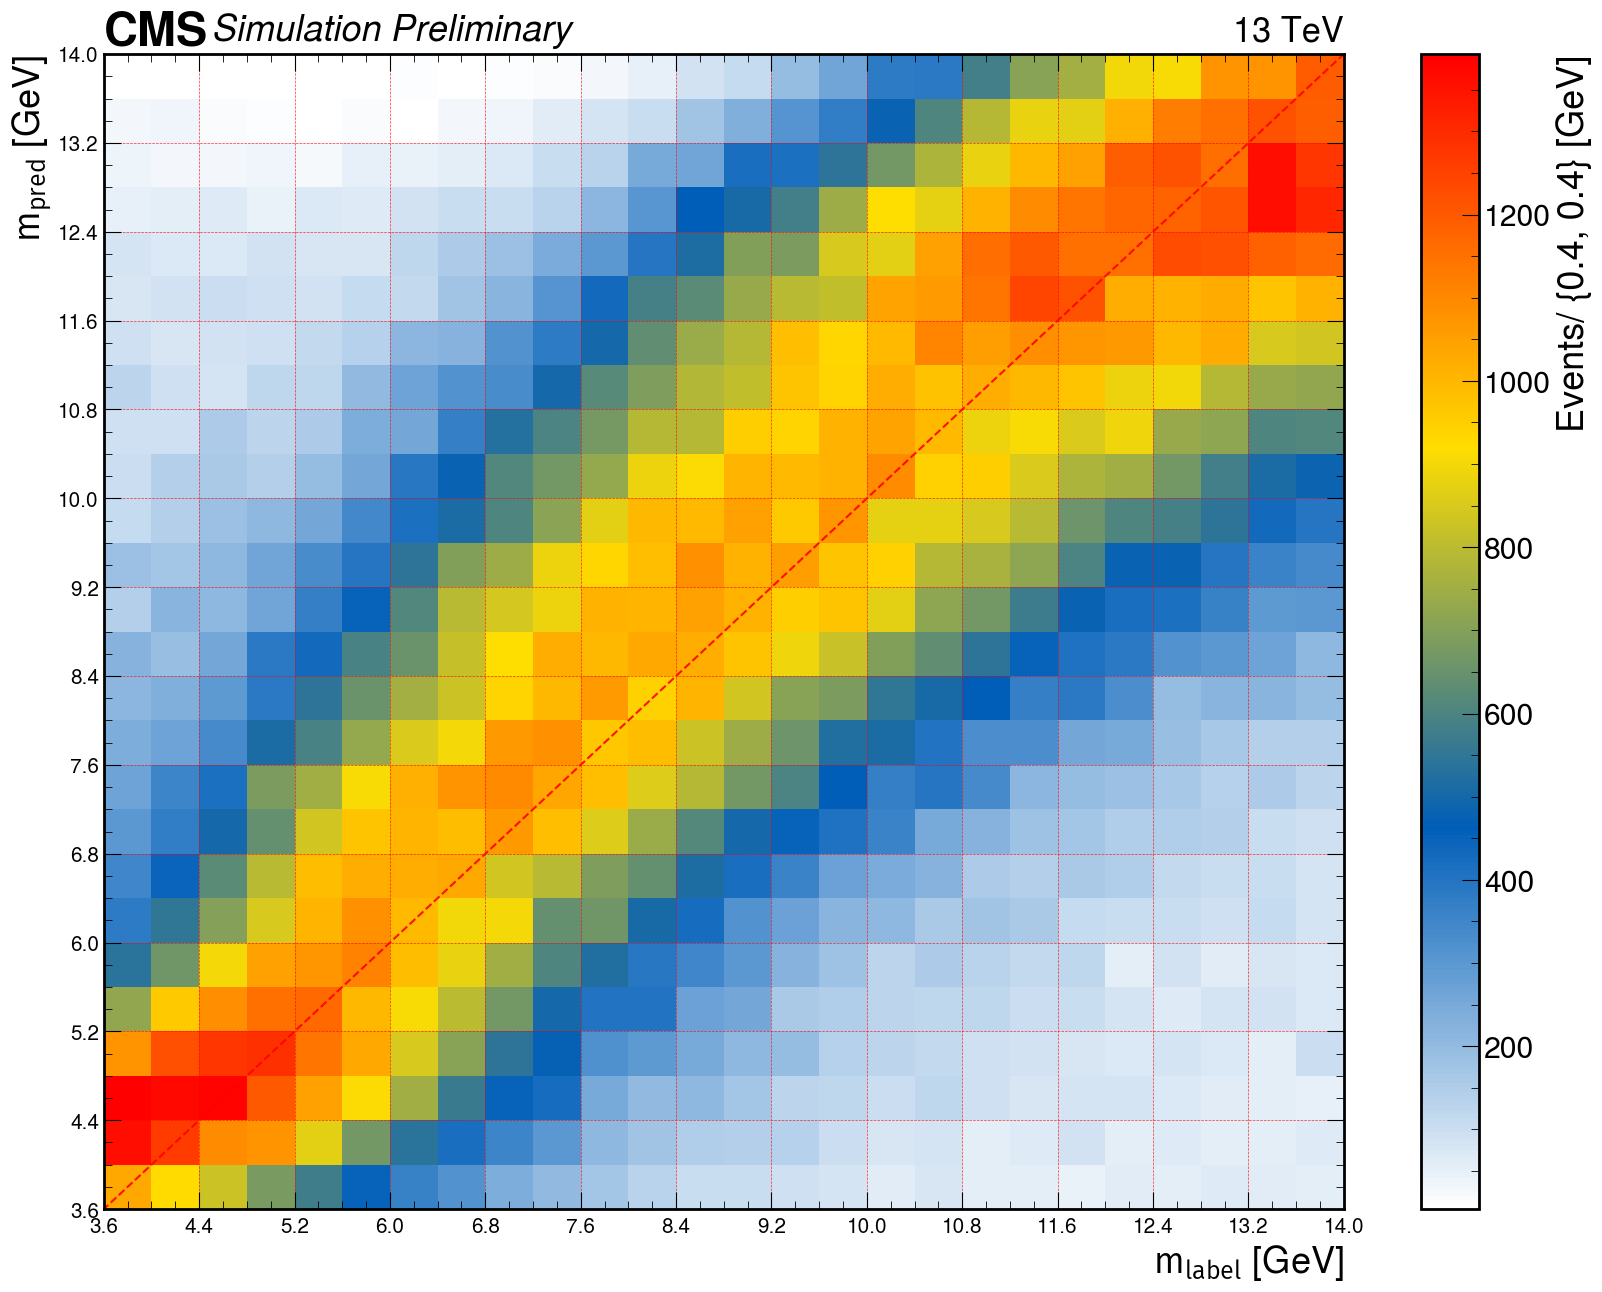

In [7]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()


# -------------m1To17p2_13channel_v2_[8,16,32,64]------------

In [6]:
local='../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs5_BatchSize1024_from25_ntrain5296128_nval596992_run0/'
rhFileList = '%s/*.pkl'%(local)
paths = glob.glob(rhFileList)
assert len(paths) > 0
print(f"{len(paths)} files found")

5 files found


In [7]:
epoch=5

data_file = paths[epoch-1]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]

loaded data file ------>  ../mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs5_BatchSize1024_from25_ntrain5296128_nval596992_run0/epoch28_val_pseudoscalar_mae1.7977_inference_data.pkl


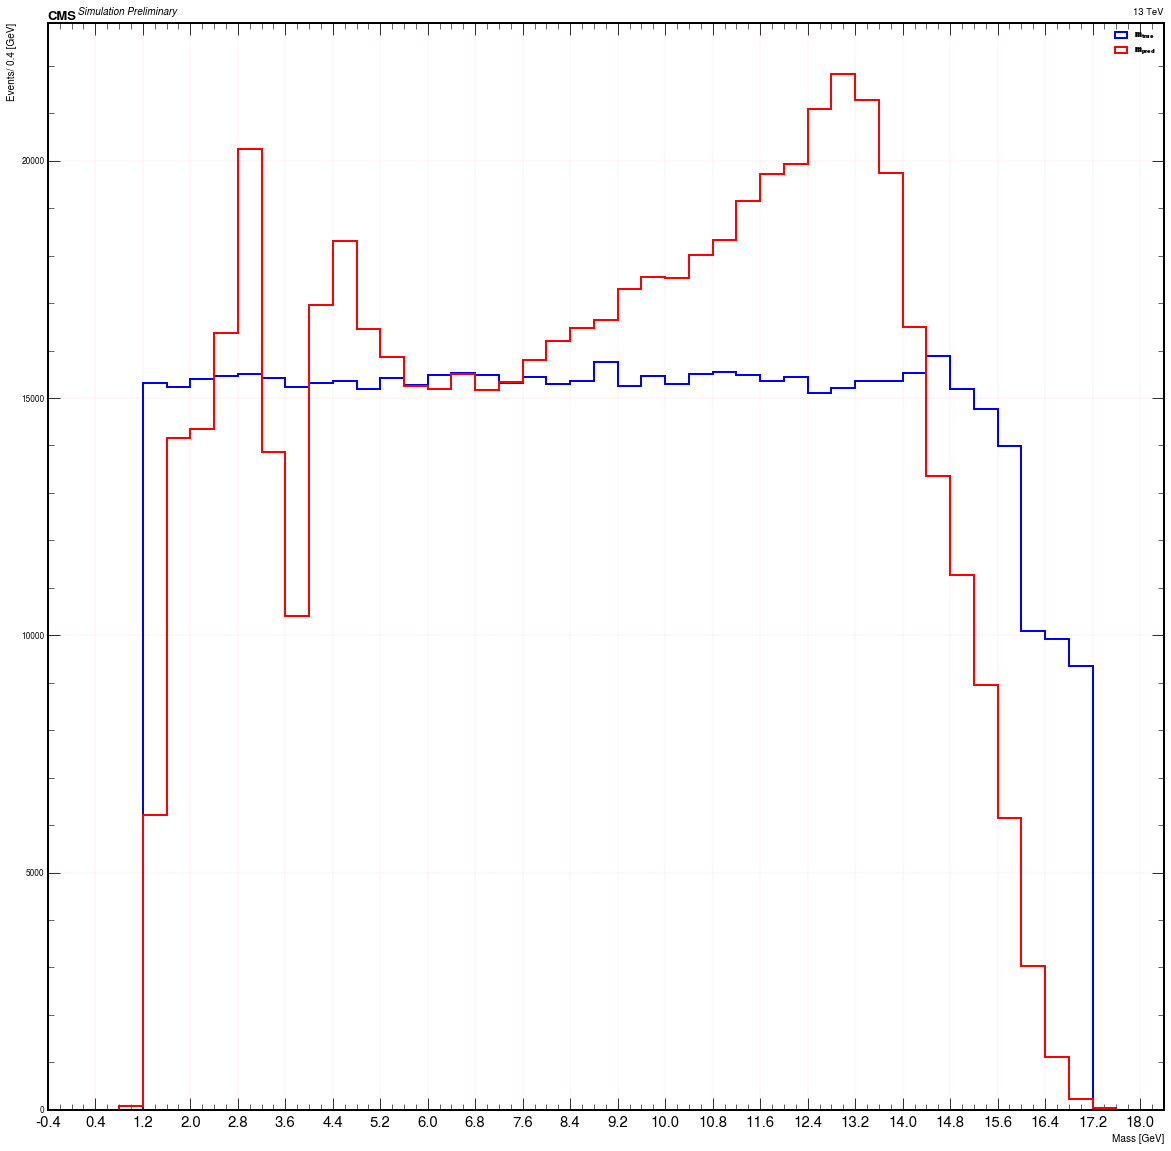

In [8]:
# Check 1D m_pred
# Extebded version
m0_min = 0.8
m0_max = 17.2
bin_size =0.4
fig, ax = plt.subplots(figsize=(20,20))
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),size=15)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

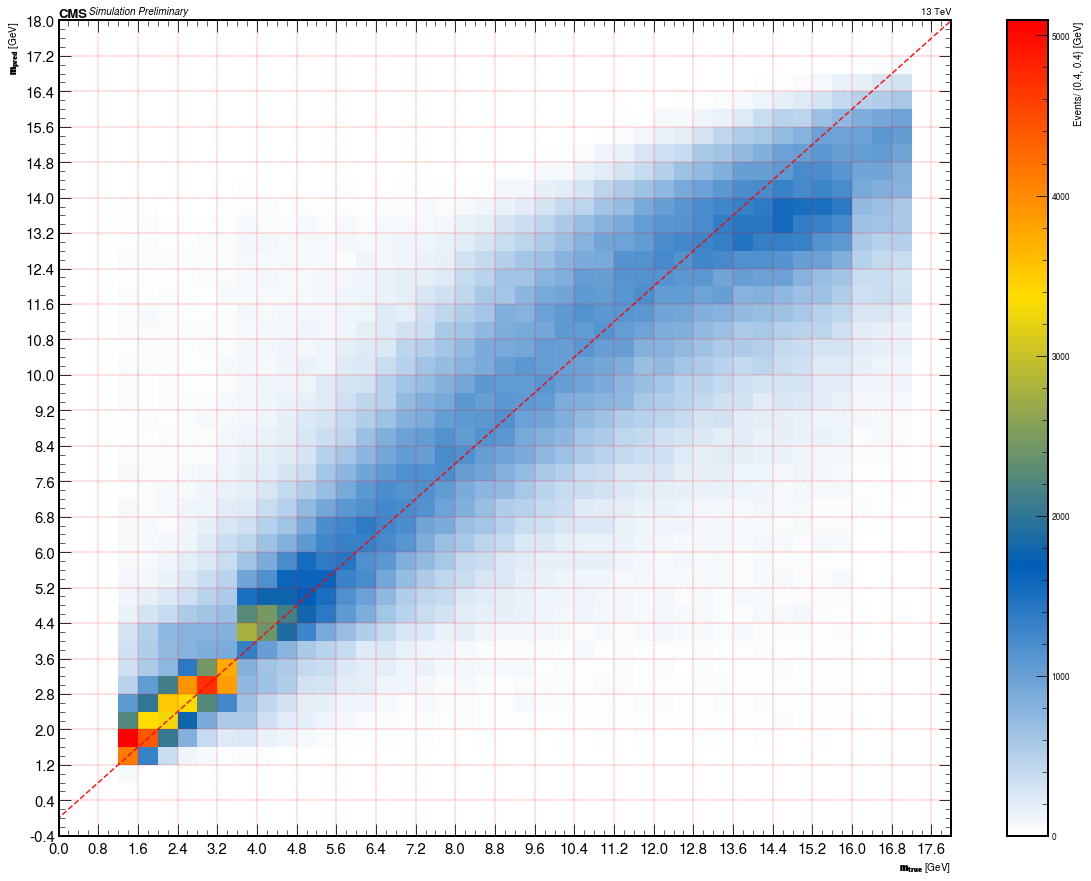

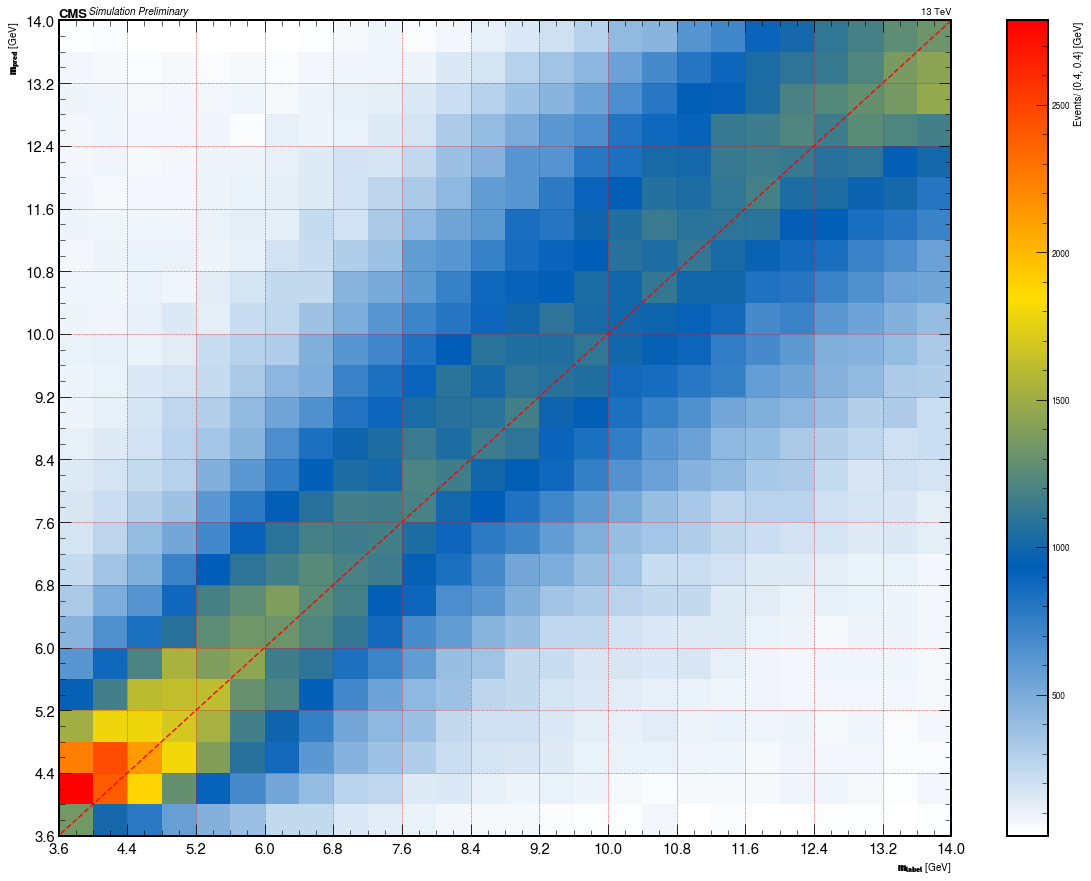

In [9]:
# 2D hist mteru and mpred
# Extended version
fig, ax = plt.subplots(figsize=(20,15))
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
plt.xticks(np.arange(3.6, 14.1, .8),size=15)
plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [10]:
!nvidia-smi

Tue Oct 24 01:25:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   26C    P0    51W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:41:00.0 Off |                    0 |
| N/A   